In [249]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Markdown as md
import plotly.io as pio

In [250]:
#Load covid 19 datset
df_orig= pd.read_csv("owid-covid-data.csv")
df=df_orig.copy()

In [251]:
df.shape

(152463, 67)

In [252]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


EDA

In [253]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
152458,ZWE,Africa,Zimbabwe,2022-01-01,214214.0,956.0,1495.429,5017.0,13.0,18.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
152459,ZWE,Africa,Zimbabwe,2022-01-02,214214.0,0.0,1409.000,5017.0,0.0,18.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
152460,ZWE,Africa,Zimbabwe,2022-01-03,216087.0,1873.0,1519.714,5047.0,30.0,19.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
152461,ZWE,Africa,Zimbabwe,2022-01-04,217678.0,1591.0,1447.143,5078.0,31.0,19.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
152462,ZWE,Africa,Zimbabwe,2022-01-05,219057.0,1379.0,1644.143,5092.0,14.0,21.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [254]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152463 entries, 0 to 152462
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    152463 non-null  object 
 1   continent                                   143274 non-null  object 
 2   location                                    152463 non-null  object 
 3   date                                        152463 non-null  object 
 4   total_cases                                 149838 non-null  float64
 5   new_cases                                   149801 non-null  float64
 6   new_cases_smoothed                          148650 non-null  float64
 7   total_deaths                                132634 non-null  float64
 8   new_deaths                                  132822 non-null  float64
 9   new_deaths_smoothed                         132690 non-null  float64
 

Lot of data with NaN. And all data is not relevant for this EDA. For example, of the 152463 rows of data, columns like excess_mortality, excess_mortality_cumulative has data in only 5234 row (~3.4%). This is very little useable data in the context of all other available data.

We will create a subset of the df later. For now, lets see the columns which have data in <33% of the rows.

In [256]:
df_temp = df[[column for column in df if df[column].count() / len(df) >= .33]]
print("List of columns which has less data and can be dropped, if needed: \n", end="")
for c in df.columns:
    if c not in df_temp.columns:
        print(c, end=", ")

List of columns which has less data and can be dropped, if needed: 
icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, 

<bold>Columns which have all data.</bold>

In [257]:
df_temp = df[[column for column in df if df[column].count() / len(df) == 1.0]]
print("List of columns which have all data: \n", end="")
for c in df.columns:
    if c in df_temp.columns:
        print(c, end=", ")

List of columns which have all data: 
iso_code, location, date, 

In [258]:
#Splitting date into month and year, and creating a new cloumns for month and date
df["day"]=pd.to_datetime(df.date).dt.day
df["month"]=pd.to_datetime(df.date).dt.month
df["year"]=pd.to_datetime(df.date).dt.year

#Create dictionary for month, and replace it in the dataframe.
month={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"Septemper",10:"October",
       11:"November",12:"December"}

df["month"]=df["month"].map(month)

df.head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,day,month,year
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,24,February,2020
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,25,February,2020
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,26,February,2020
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,27,February,2020
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,28,February,2020
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,29,February,2020
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1,March,2020
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2,March,2020
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,3,March,2020
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,4,March,2020


In [259]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

Some simple tests on the data

In [260]:
#New cases in United Kingdom in February 2021
df.loc[df.year == 2021].loc[df.location == 'United Kingdom'].loc[df.month =='February'].new_cases.sum()
#Confirmed this via Google

359725.0

In [261]:
#Total covid deaths in the world in 2021 by each month

df.loc[df.year == 2021].loc[df.location == 'World'].groupby(["month"]).new_deaths.sum()

#Alternatively, below code EXCLUDING WORLD should give the same result, but it doesnt,
#   as location column includes not just countries, but a few other entries. This is shown below.
#df.loc[df.year == 2021].loc[df.location != 'World'].groupby(["month"]).new_deaths.sum()

month
April        378788.0
August       299853.0
December     218968.0
February     311215.0
January      417387.0
July         260692.0
June         271665.0
March        300341.0
May          379368.0
November     215601.0
October      216476.0
Septemper    264636.0
Name: new_deaths, dtype: float64

In [262]:
df[df['continent'].isna()].location.unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'International', 'Low income', 'Lower middle income',
       'North America', 'Oceania', 'South America', 'Upper middle income',
       'World'], dtype=object)

In [264]:
index_rows = df[ df["location"].isin( df[df['continent'].isna()].location.unique() ) ].index
index_rows
#index_rows.size
df=df.drop(index_rows, inplace=True)


In [265]:
#Another way to see this data
#df.loc[df.year == 2021].loc[df.location == 'World'].groupby(["month"]).new_deaths.sum()
df.loc[df.year == 2021].loc[df.location != 'World'].groupby(["month"]).new_deaths.sum()
#df.loc[df.year == 2021].groupby(["month"]).new_deaths.sum()

AttributeError: 'NoneType' object has no attribute 'loc'

Extract relevant columns to a subset for further data observations.

In [ ]:
df_subset=df[['year','month','iso_code', 'continent','location','total_cases','new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated','people_fully_vaccinated','population']]
df_subset.head(20)

,year,month,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population
0,2020,February,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,39835428.0
1,2020,February,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
2,2020,February,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
3,2020,February,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
4,2020,February,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
5,2020,February,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
6,2020,March,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
7,2020,March,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
8,2020,March,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
9,2020,March,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0


In [ ]:
df_subset['location'].unique().size
#df_subset[['location', 'new_cases']].groupby(["location"]).head()

225

In [ ]:
df_subset.isnull().sum()

year                            0
month                           0
iso_code                        0
continent                       0
location                        0
total_cases                  2618
new_cases                    2662
total_deaths                19616
new_deaths                  19628
people_vaccinated          110231
people_fully_vaccinated    112944
population                    317
dtype: int64

In [ ]:
#df_group=df_subset.groupby(["year","month","continent","location","iso_code"]).sum()
#df_group.shape
#df_group.head()

count    1.406120e+05
mean     2.113590e+03
std      1.224297e+04
min     -7.434700e+04
25%      0.000000e+00
50%      5.300000e+01
75%      6.610000e+02
max      1.171378e+06
Name: new_cases, dtype: float64


C:\Users\vn.US\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



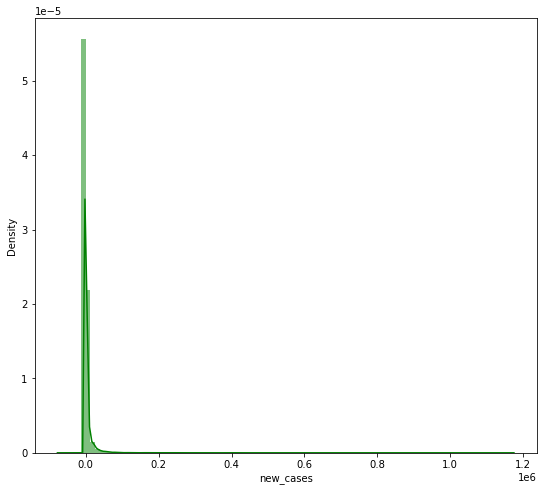

In [ ]:
print(df_subset['new_cases'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['new_cases'], color='g', bins=100, hist_kws={'alpha': 0.5});

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'total_cases'}>,
        <AxesSubplot:title={'center':'new_cases'}>],
       [<AxesSubplot:title={'center':'total_deaths'}>,
        <AxesSubplot:title={'center':'new_deaths'}>,
        <AxesSubplot:title={'center':'people_vaccinated'}>],
       [<AxesSubplot:title={'center':'people_fully_vaccinated'}>,
        <AxesSubplot:title={'center':'population'}>, <AxesSubplot:>]],
      dtype=object)

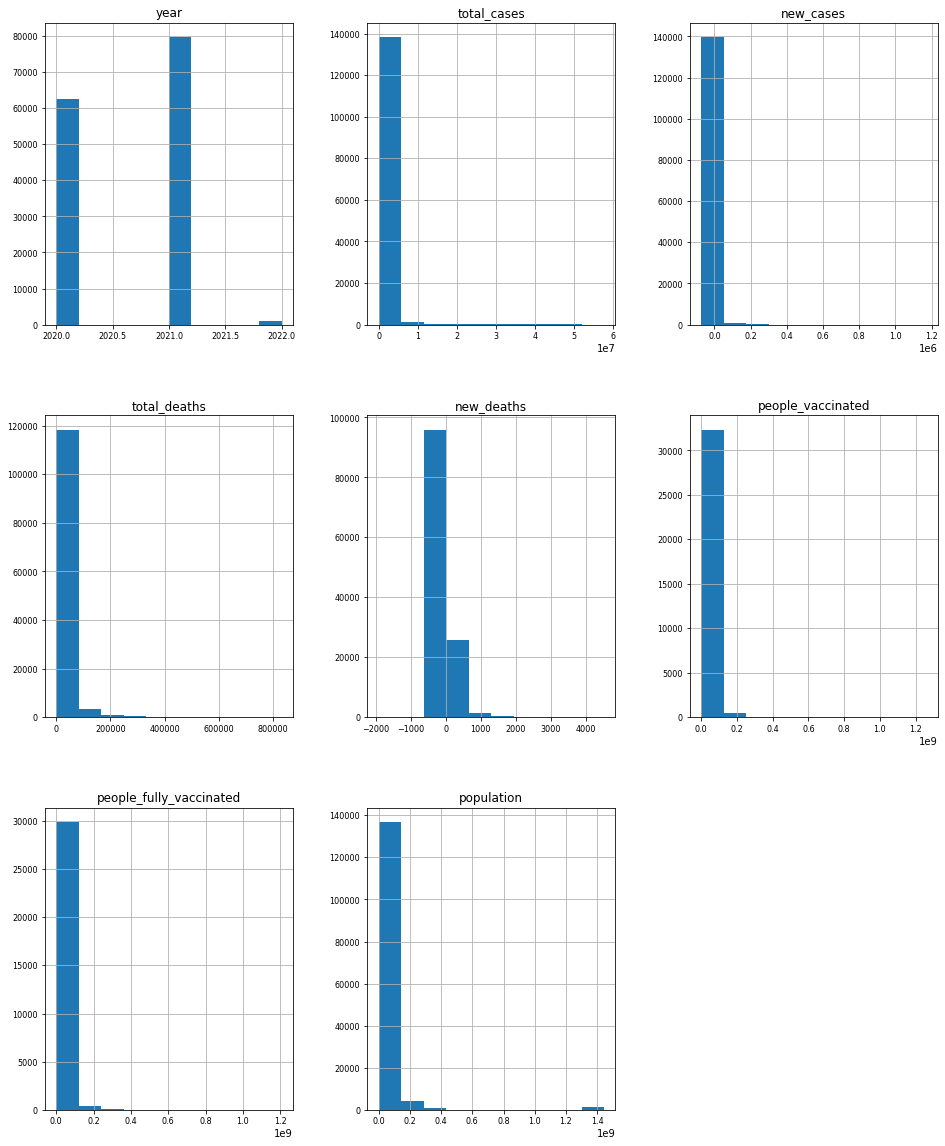

In [ ]:
df_num = df_subset.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

SOME VISUALIZATIONS

Lets look at the data from 4 randomly selected countries:

1. Brasil
2. Denmark
3. India
4. USA

Use Date range: April 1, 2020 -to- December 31, 2021

In [270]:
start_date = '2020-04-01'
end_date = '2021-12-31'

flag = (pd.to_datetime(df_orig['date']) >= start_date) & (pd.to_datetime(df_orig['date']) <= end_date) & (df_orig['location']=='Brazil')
df_Brazil=df_orig.loc[flag]

flag = (pd.to_datetime(df_orig['date']) >= start_date) & (pd.to_datetime(df_orig['date']) <= end_date) & (df_orig['location']=='Denmark')
df_Denmark=df_orig.loc[flag]

flag = (pd.to_datetime(df_orig['date']) >= start_date) & (pd.to_datetime(df_orig['date']) <= end_date) & (df_orig['location']=='India')
df_India=df_orig.loc[flag]

flag = (pd.to_datetime(df_orig['date']) >= start_date) & (pd.to_datetime(df_orig['date']) <= end_date) & (df_orig['location']=='USA')
df_USA=df_orig.loc[flag]

#df_grouped=df_subset.groupby(["year","month","continent","location","iso_code"]).sum()
#df_grouped.isnull().sum().sum()

In [273]:
fig1=px.bar(df_India,x='date',y='total_cases',color='total_cases',
            title='Total Cases In India From April 2020 To Decemer 2021  ')
#use color as total_cases to get variation of colors according to value
fig1.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig2 = px.bar(new_df, x="continent", y=["total_cases", "total_deaths","people_fully_vaccinated"],height=330)
fig2.show()